# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 6

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **17 апреля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [328]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

from statsmodels.sandbox.stats.multicomp import multipletests
from tqdm.notebook import tqdm
from statsmodels.stats.diagnostic import lilliefors

%matplotlib inline


# Критерии согласия

## Теоретическая часть


 
### Задача 1. (основной поток, 5 баллов)
 Компания по производству кормов для собак провела опрос $5000$ владельцев собак о том, какой корм предпочитают их питомцы. По результатам опроса оказалось, что $1010$ собак предпочитают корм со вкусом лосося, $2200$ &mdash; со вкусом курицы, $950$ &mdash; со вкусом говядины, а все остальные собаки предпочитают корм с овощами. Компания сделала предположение, что вероятности предпочтения кормов равны соответственно $\theta, 2\theta, \theta, 1-4\theta$,
	где $\theta\in(0,1/4)$. Верно ли данное предположение? Выпишите теоретические формулы и код для подсчета значения статистики и p-value  в `scipy`. Вычисление статистики и p-value можно выполнить в Питоне.


Найдем вероятность того, что в каждой i-той группе "по предпочтениям" находится конкретно $\mu_i$ собачников. 

$\mu_1 = 1010; \mu_2 = 2200; \mu_3 = 950; \mu_4 = 840; $

$P = \prod\limits_{i=1}^4 p_i^{\mu_i}$. Тогда логарифмическая функция правдоподобия - $l = \sum\limits_{i=1}^4 \mu_i \ln(p_i) = 1010 ln(\theta) + 2200 ln(2 \theta) + 950 ln(\theta) + 840 ln(1 - 4 \theta) \to max$. Получается, что $\hat{\theta} = 0.208$

Тогда найдем оценки $p_i$:

$p_1 = 0.208; p_2 = 0.416; p_3 = 0.208; p_4 = 0.168; $

Формула для хи: $\hat{\chi} = \sum\limits_{i=1}^{k=4} \frac{ \left( \mu_i - n p_i(\hat{\theta}) \right) ^2 }{n p_i(\hat{\theta})}$

Степень свободы d = 1

$p_{value} = P ((\chi^2)_{k-1-d} \geq \hat{\chi})$

`p_val = sps.chi2(k-1-d).sf(hat_chi)`


In [4]:
hat_chi, p_val = sps.chisquare(f_obs = [1010, 2200, 950, 840], f_exp = 5000*np.array([0.208, 0.416, 0.208, 0.168]), ddof=1)

print(f'Статистика: {round(hat_chi, 2)}\np-value: {round(p_val, 4)}')
print('p-value < 0.05, значит предположение отвергается')

Статистика: 15.58
p-value: 0.0004
p-value < 0.05, значит предположение отвергается


## Практическая часть

При решении стоит использовать **готовые реализации критериев из** `scipy.stats`. При возникновении затруднений посмотрите в ноутбук с лекции 9.
________________
### Задача 2. (все потоки, 8 баллов)

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины. 

**1.** Реализуйте критерий хи-квадрат для проверки корректности генерации выборки $U\{1, ..., 10\}$ (дискретное равномерное распределение). Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения. Подберите размер выборки такой, чтобы выполнялись условия применимости критерия хи-квадрат. Поясните свой выбор.





Критерий хи-квадрат применим при $n \geq 50; \: \forall i: n p_i \geq 5$. Т.к. хотим исследовать распеделение $U\{1, ..., 10\}$, то логично взять $k = 10$. Если $k = log_2 n$, то для выполнения всех условий $n \geq 1024$. Возьмем $n=2000$.

In [91]:
n = 2000
k = 10
sample = sps.randint(1, 11).rvs(size = n)
unique = np.unique(sample, return_counts=True)
print('p-value = ', round(sps.chisquare(f_obs=unique[1], f_exp=n*np.ones(k)/k)[1], 3))

p-value =  0.565


По результатам проверки видно, что $\text{p-value} > 0.05$. Значит, гипотезу о равномерном распределении мы не отвергаем.

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления дискретной плотности (вероятности) воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.




In [242]:
n = 1000
mu = 5
sample = sps.poisson(mu=mu).rvs(size=1000)
unique = np.unique(sample, return_counts=True)
print(unique)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([  6,  38, 102, 126, 180, 159, 156,  93,  68,  39,  18,  10,   3,
         1,   1]))


In [228]:
# разбиваем на группы так, чтобы n*p_i > 5

x = np.linspace(0, 30, 31)
print(n*sps.poisson(mu=mu).pmf(x))

# найдем такое значение x_i, что p_(x_i)*n < 5 и засунем их в одну группу (только надо будет проверить, что в этой 
# группе все таки будет >5 эл-тов) 



[6.73794700e+00 3.36897350e+01 8.42243375e+01 1.40373896e+02
 1.75467370e+02 1.75467370e+02 1.46222808e+02 1.04444863e+02
 6.52780393e+01 3.62655774e+01 1.81327887e+01 8.24217669e+00
 3.43424029e+00 1.32086165e+00 4.71736303e-01 1.57245434e-01
 4.91391982e-02 1.44527054e-02 4.01464038e-03 1.05648431e-03
 2.64121077e-04 6.28859708e-05 1.42922661e-05 3.10701437e-06
 6.47294660e-07 1.29458932e-07 2.48959485e-08 4.61036083e-09
 8.23278719e-10 1.41944607e-10 2.36574345e-11]


In [229]:
x_i = 12
print(sps.poisson(mu=mu).sf(x_i-1)*n, '> 5')


5.453091913009344 > 5


In [244]:
idx = np.where(unique[0] > x_i-1)
last_group = np.sum(unique[1][idx[0]])
groups = np.append(unique[1][:x_i], last_group) # количество эл-тов в каждой группе
f_exp = np.append(n*sps.poisson(mu=mu).pmf(x[:x_i]), sps.poisson(mu=mu).sf(x_i-1)*n) # ожидаемое количество эл-тов в каждой группе
print('p-value = ', round(sps.chisquare(f_obs=groups, f_exp=f_exp)[1], 3), '> 0.05')

p-value =  0.602 > 0.05


**Вывод:**

По результатам исследования на оновании p-value можно сделать выводы, что гипотеза о том, что `sps.randint` действительно генерирует равномерное распределение, не отверглась. Аналогично и для распределения Пуассона, гипотеза о "правильности" генерации выборки не отверглась. 

__________________
### Задача 3. (основной поток, 8 баллов)

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка;
* Лиллиефорса.

При этом критерий Колмогорова универсален, но существует его модификация для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можно взять реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>. Критерий Колмогорова можно попробовать применить для конкретной $F_0$ (оценив ее), пример использования можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На семинаре разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100. В данном случае можно привести теоретические соображения, согласно которым стоит использовать количество генерируемых выборок `sample_count `$\ge 10^6$, но для ускорения работы при выполнении задания можете использовать `sample_count = 10**4`.



*Подсказка:*

In [ ]:
# max_sample_size = ...
# sample_count = ...
# is_reject_<критерий> = np.zeros((max_sample_size, sample_count))

# # tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
# for i in tqdm(range(max_sample_size)):
#     for j in range(sample_count):
#         sample = ...
#         is_reject_<критерий>[i, j] = ...

Ваша реализация:

In [509]:
alpha = 0.05
max_sample_size = 100
sample_count = sample_count = 10**4
is_reject_kolmogorov = np.zeros((max_sample_size+1, sample_count))
is_reject_jarque_bera = np.zeros((max_sample_size+1, sample_count))
is_reject_shapiro = np.zeros((max_sample_size+1, sample_count))
is_reject_lilliefors = np.zeros((max_sample_size+1, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
# for i in tqdm(range(5, max_sample_size)):
#     for j in range(sample_count):
for i in range(5, max_sample_size+1):
    for j in range(sample_count):
        sample = sps.norm.rvs(size=i)
        
        is_reject_kolmogorov[i, j] = sps.kstest(sample, cdf=sps.norm.cdf)[1] <= alpha
        is_reject_jarque_bera[i, j] = sps.jarque_bera(sample)[1] <= alpha
        is_reject_shapiro[i, j] = sps.shapiro(sample)[1] <= alpha
        is_reject_lilliefors[i, j] = lilliefors(sample)[1] <= alpha

Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

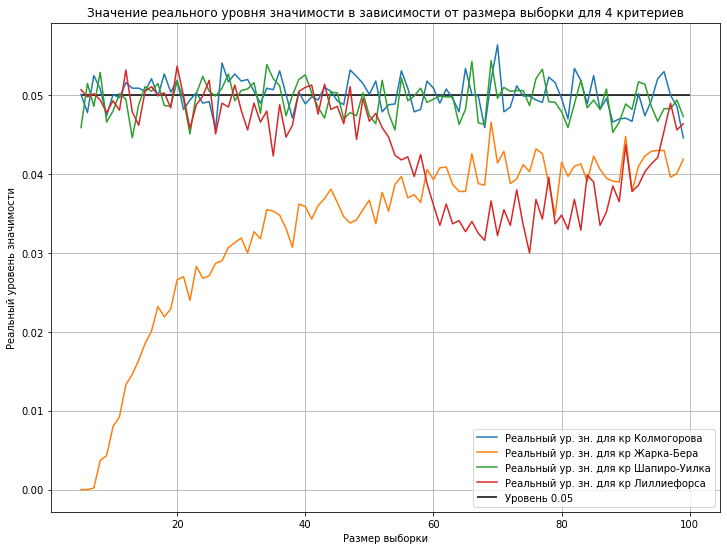

In [510]:
grid = np.arange(5, max_sample_size+1)

mean_kolmogorov = np.mean(is_reject_kolmogorov, axis = 1)[5:]
mean_jarque_bera = np.mean(is_reject_jarque_bera, axis = 1)[5:]
mean_shapiro = np.mean(is_reject_shapiro, axis = 1)[5:]
mean_lilliefors = np.mean(is_reject_lilliefors, axis = 1)[5:]

plt.figure(figsize=(12, 9))
plt.grid(True)
plt.plot(grid, mean_kolmogorov, label='Реальный ур. зн. для кр Колмогорова')
plt.plot(grid, mean_jarque_bera, label='Реальный ур. зн. для кр Жарка-Бера')
plt.plot(grid, mean_shapiro, label='Реальный ур. зн. для кр Шапиро-Уилка')
plt.plot(grid, mean_lilliefors, label='Реальный ур. зн. для кр Лиллиефорса')
plt.hlines(alpha, 5, 100, label='Уровень 0.05')
plt.xlabel('Размер выборки')
plt.ylabel('Реальный уровень значимости')
plt.title('Значение реального уровня значимости в зависимости от размера выборки для 4 критериев')
plt.legend()
plt.show()

In [ ]:
<...>

Какой можно сделать вывод?

**Вывод:** Реальный уровень значимости критерия Жарка-Бера асимптотически стремится к 0,05. Это хорошо, потому что реальная вероятность отвергнуть правильную гипотезу меньше 0,05 (ограничена 0,05). Реальный уровень значимости критерия Лиллиефорса часто находится ниже теоретического уровня значимости 0,05. Это тоже хорошо, но не так, как у критерия Жарка-Бера. Реальные уровни значимости критериев Колмогорова и Шапиро-Уилка практически точно совпадают с теоретическим уровнем значимости 0,05. При этом выходят выше за 0,05 всего на несколько тысячных, что ничтожно мало.

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


H0: нормальное распределение
H1: Коши

In [504]:
alpha = 0.05
max_sample_size = 100
sample_count = sample_count = 10**4
is_reject_kolmogorov_new = np.zeros((max_sample_size+1, sample_count))
is_reject_jarque_bera_new = np.zeros((max_sample_size+1, sample_count))
is_reject_shapiro_new = np.zeros((max_sample_size+1, sample_count))
is_reject_lilliefors_new = np.zeros((max_sample_size+1, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
# for i in tqdm(range(5, max_sample_size)):
#     for j in range(sample_count):
for i in tqdm(range(5, max_sample_size+1)):
    for j in range(sample_count):
        sample_new = sps.cauchy.rvs(size=i)
        
        is_reject_kolmogorov_new[i, j] = sps.kstest(sample_new, cdf=sps.norm.cdf)[1] <= alpha
        is_reject_jarque_bera_new[i, j] = sps.jarque_bera(sample_new)[1] <= alpha
        is_reject_shapiro_new[i, j] = sps.shapiro(sample_new)[1] <= alpha
        is_reject_lilliefors_new[i, j] = lilliefors(sample_new)[1] <= alpha

  0%|          | 0/96 [00:00<?, ?it/s]

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

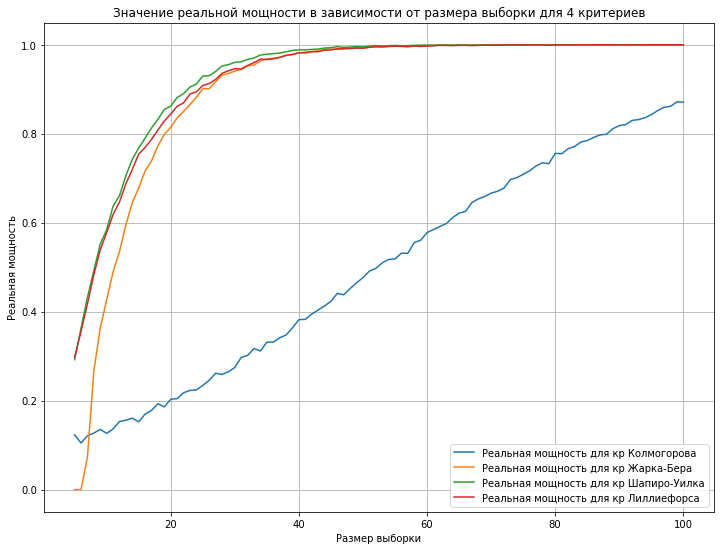

In [508]:
grid = np.arange(5, max_sample_size+1)

mean_kolmogorov_new = np.mean(is_reject_kolmogorov_new, axis = 1)[5:]
mean_jarque_bera_new = np.mean(is_reject_jarque_bera_new, axis = 1)[5:]
mean_shapiro_new = np.mean(is_reject_shapiro_new, axis = 1)[5:]
mean_lilliefors_new = np.mean(is_reject_lilliefors_new, axis = 1)[5:]

plt.figure(figsize=(12, 9))
plt.grid(True)
plt.plot(grid, mean_kolmogorov_new, label='Реальная мощность для кр Колмогорова')
plt.plot(grid, mean_jarque_bera_new, label='Реальная мощность для кр Жарка-Бера')
plt.plot(grid, mean_shapiro_new, label='Реальная мощность для кр Шапиро-Уилка')
plt.plot(grid, mean_lilliefors_new, label='Реальная мощность для кр Лиллиефорса')
# plt.hlines(alpha, 5, 100, label='Уровень 0.05')
plt.xlabel('Размер выборки')
plt.ylabel('Реальная мощность')
plt.title('Значение реальной мощности в зависимости от размера выборки для 4 критериев')
plt.legend()
plt.show()

**Вывод:** По графику видно, что критерий Колмогорова не такой мощный как все остальные. Мощность критерий Жарка-Бера при маленьких размерах выборки (<20) меньше, чем у критерия Лиллиефорса и Шапиро-Уилка. При средних размерах выборки (от 20 до 50) мощность критерия Шапиро-Уилка выше, чем у критерия Лиллиефорса и Жарка-Бера. При больших размерах выборки (>50) мощности критерией Жарка-Бера, Шапиро-Уилса и Лиллиефорса примерно равны 1, что является отличным результатом.

**3*.** (4 балла) Распределение [Стьюдента](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0) является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы). 

Постройте на одном графике графики плотности распределения Коши, распределения Стьюдента с 1, 5, 10 степенями свободы и стандартного нормального распределения. Как меняется форма графика распределения Стьюдента с изменением количества степеней свободы? 

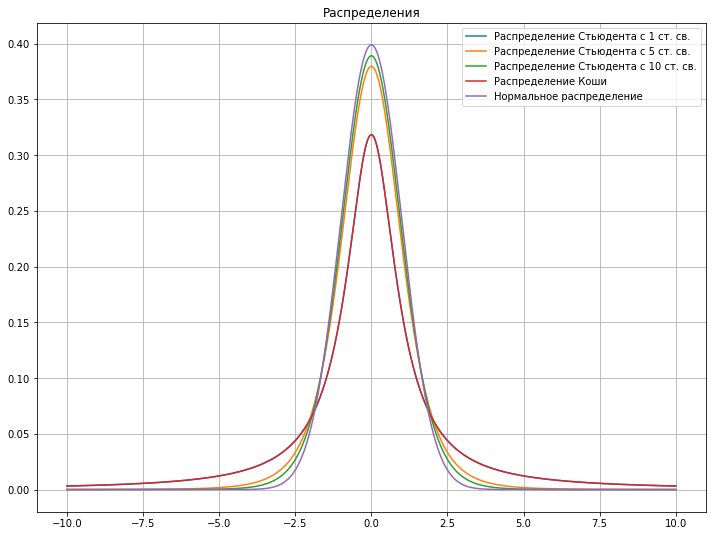

In [518]:
grid = np.linspace(-10, 10, 10000)

plt.figure(figsize=(12, 9))
plt.grid(True)
plt.plot(grid, sps.t(df=1).pdf(grid), label='Распределение Стьюдента с 1 ст. св.')
plt.plot(grid, sps.t(df=5).pdf(grid), label='Распределение Стьюдента с 5 ст. св.')
plt.plot(grid, sps.t(df=10).pdf(grid), label='Распределение Стьюдента с 10 ст. св.')
plt.plot(grid, sps.cauchy.pdf(grid), label='Распределение Коши')
plt.plot(grid, sps.norm.pdf(grid), label='Нормальное распределение')
plt.title('Распределения')


plt.legend()
plt.show()



Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно реализовать функцию (например, принимающую количество степенй свободы). Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от **количества степеней свободы** для каждого из трех критериев. Не забудьте добавить легенду и подписать оси.

In [ ]:
<...>

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы. Объясните наблюдаемую зависимость мощности от степени свободы.

<...>

__________________
### Задача 4. (основной поток, 12 баллов)


Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>. Для этого зайдите в папку "DataFolder" и скачайте файл `wine.data`. Читать файл можно с помощью функции `read_csv`.  В этом датасете представлены различные характеристики вин. Возьмите все колонки, кроме `Class` (класс вина). В дальнейшем, как и раньше, будем называть колонки признаками.

In [250]:
data = pd.read_csv('wine.data', names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                                         'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                                         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
data

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Для каждого из признаков нарисуйте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько строк и столбцов, используя `plt.subplot`.

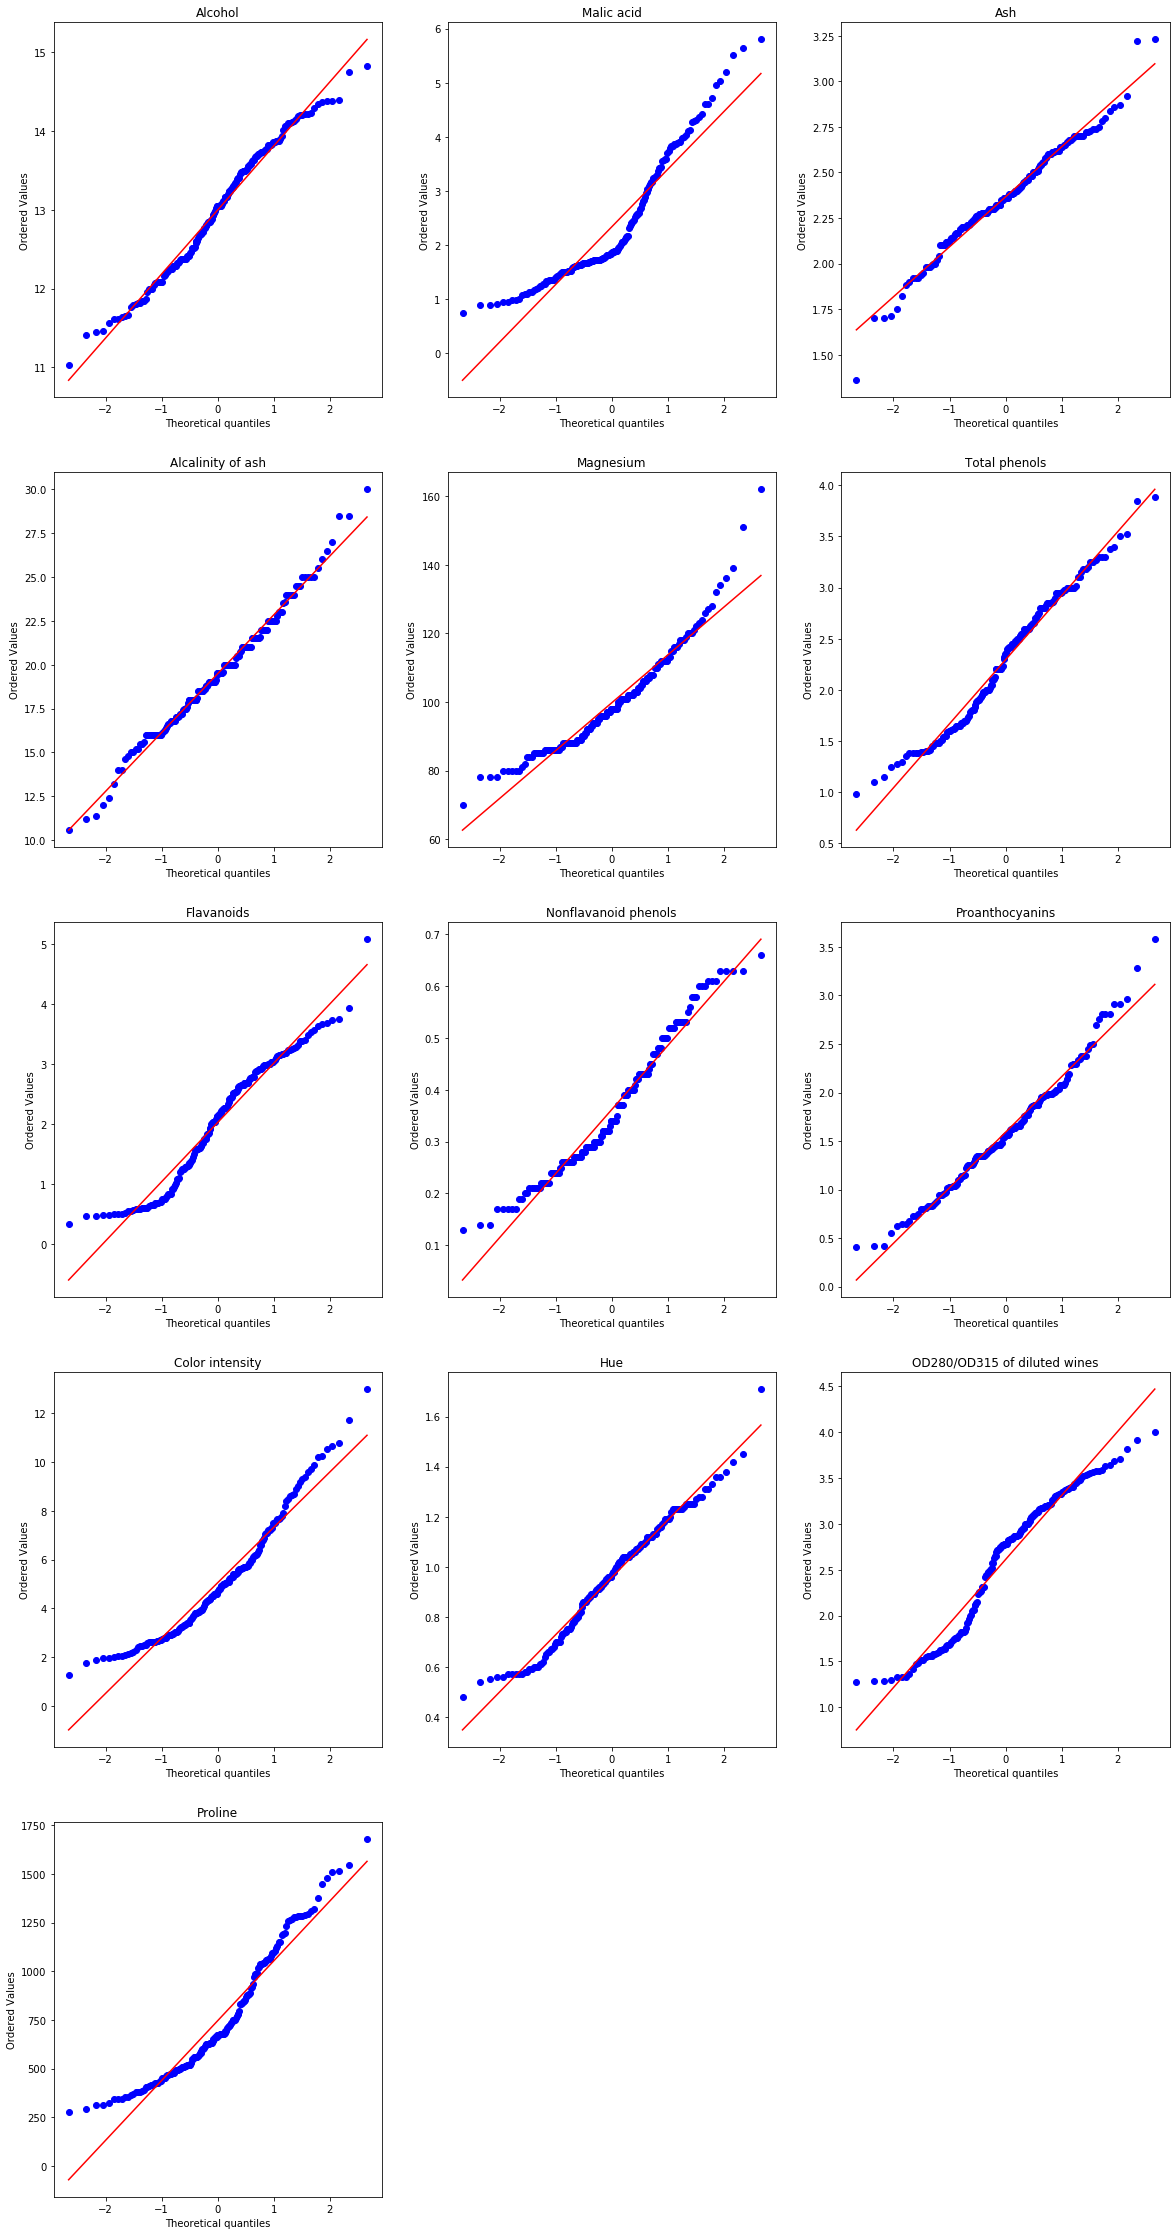

In [312]:
used_headers = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

plt.figure(figsize=(20, 40))
for i, header in enumerate(used_headers):
    ax = plt.subplot(5, 3, 1 + i)
    sps.probplot(data[header], plot=ax)
    plt.title(header)

plt.show()

Для каких признаков можно говорить об их нормальности и почему?

**Ответ:** Судя по графикам QQ-plot о нормальности можно говорить у признаков Ash, Alcalinity of ash, Proanthocyanins, потому что точки очень близки к фитирующей прямой, что говорит о том, что их распределение похоже на нормальное. У остальных же наблюдаются явные отклонения от фитирующей прямой (график s-образный или сильно изогнутый или с отклонениями на концах), поэтому их распределения не похожи на нормальные. 



Проверьте нормальность каждого признака статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы. 

Для каждого признака используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

**Ответ:** Критерии Лиллиефорса, Шапиро-Уилка, Жарка-Бера

Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех признаков и всех критериев сразу. Почему так нужно делать?

**Ответ:** Чтобы ограничить вероятность совершения ошибки первого рода при проверки сразу несколькими гипотезами сразу нескольких признаков, чтобы ошибка не накапливалась. 

Какой метод для контроля FWER стоит применить и почему?

**Ответ:** Т.к. я ничего не могу сказать о независимости статистик, то буду использовать метод Холма.

Как понять из результата процедуры множественной проверки гипотез, нормальность каких признаков следует отклонить?

**Ответ:** Значение корректированных p-value будет меньше заданного уровня значимости $\alpha$

Если нормальность не отклоняется, что можно сказать про выборку? Ответ находится в презентации с лекции.

**Ответ:** Значит, что распределение действительно похоже на нормальное, либо критерии недостоточно мощные (ошибка 2 рода).

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу. 

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результаты соберите обратно в таблицу с помощью метода `reshape`, которому необходимо передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия признаков, а названий столбцов — используемые критерии. В таблице должны присутстововать как значения p-value, так и результат проверки (`True` в случае отвержения).

In [450]:
alpha = 0.05
methods = {"Lilliefors": lilliefors, "Shapiro-Wilk": sps.shapiro, "Jarque-Bera": sps.jarque_bera}
df = pd.DataFrame()

for i, header in enumerate(used_headers):
    d = {}
    attr = data[header]
    for name, method in methods.items():
        d[name + ' p-value'] = method(attr)[1]
        if method(attr)[1] <= alpha:
            d[name + ' rejected'] = True
        else:
            d[name + ' rejected'] = False
    ser = pd.Series(data=d, name=header)
    df[header] = ser

df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Lilliefors p-value,0.058382,0.001,0.186504,0.098863,0.002494,0.035086,0.004657,0.001,0.216578,0.002182,0.117974,0.001,0.001
Lilliefors rejected,False,True,False,False,True,True,True,True,False,True,False,True,True
Shapiro-Wilk p-value,0.020052,0.0,0.038685,0.263869,0.000001,0.004396,0.000017,0.000106,0.014453,0.000001,0.017426,0.000002,0.0
Shapiro-Wilk rejected,True,True,True,False,True,True,True,True,True,True,True,True,True
Jarque-Bera p-value,0.061068,0.0,0.008486,0.250934,0.0,0.063122,0.052731,0.010714,0.007841,0.000011,0.601244,0.003088,0.000139
Jarque-Bera rejected,False,True,True,False,True,False,False,True,True,True,False,True,True


In [451]:
fwer = "holm"

all_p_vals = np.array([list(df.T[name + ' p-value']) for name in methods])
reject, pvals_corrected = multipletests(all_p_vals.ravel(), method=fwer, alpha=alpha)[:2]
reject = list(reject.reshape(all_p_vals.shape))
pvals_corrected = list(pvals_corrected.reshape(all_p_vals.shape))

df = df.T

In [452]:
for i, name in enumerate(methods):
    df[name + ' p-value corrected'] = pvals_corrected[i]
    df[name + ' rejected corrected'] = reject[i]
df

,Lilliefors p-value,Lilliefors rejected,Shapiro-Wilk p-value,Shapiro-Wilk rejected,Jarque-Bera p-value,Jarque-Bera rejected,Lilliefors p-value corrected,Lilliefors rejected corrected,Shapiro-Wilk p-value corrected,Shapiro-Wilk rejected corrected,Jarque-Bera p-value corrected,Jarque-Bera rejected corrected
Alcohol,0.058382,False,0.020052,True,0.061068,False,0.583823,False,2.807240e-01,False,5.838225e-01,False
Malic acid,0.001,True,0.0,True,0.0,True,0.028000,True,1.119453e-08,True,4.127075e-06,True
Ash,0.186504,False,0.038685,True,0.008486,True,0.932521,False,4.642231e-01,False,1.527465e-01,False
Alcalinity of ash,0.098863,False,0.263869,False,0.250934,False,0.692038,False,9.325205e-01,False,9.325205e-01,False
Magnesium,0.002494,True,0.000001,True,0.0,True,0.057361,False,2.220896e-05,True,2.684519e-13,True
Total phenols,0.035086,True,0.004396,True,0.063122,False,0.456116,False,9.231080e-02,False,5.838225e-01,False
Flavanoids,0.004657,True,0.000017,True,0.052731,False,0.093148,False,5.205097e-04,True,5.800432e-01,False
Nonflavanoid phenols,0.001,True,0.000106,True,0.010714,True,0.028000,True,3.165798e-03,True,1.821310e-01,False
Proanthocyanins,0.216578,False,0.014453,True,0.007841,True,0.932521,False,2.312541e-01,False,1.489786e-01,False
Color intensity,0.002182,True,0.000001,True,0.000011,True,0.052373,False,3.138022e-05,True,3.495238e-04,True


Будем смотреть на скорректированные решения. Будем поступать как с лошадью из презентации. Разные методы проверяют разные признаки нормальности данных. У нас всего 3 метода. Поэтому, если хотя бы один метод отвергает гипотезу, то для данного параметра вина гипотезу нормальности будем отвергать (если лошади приделать рога корогы, то по размерам, копытам, цвету, хвосту животное останется лошадью, а по рогам это уже не будет лошадь).

In [458]:
columns = [name + ' rejected corrected' for name in methods]
df[columns]

,Lilliefors rejected corrected,Shapiro-Wilk rejected corrected,Jarque-Bera rejected corrected
Alcohol,False,False,False
Malic acid,True,True,True
Ash,False,False,False
Alcalinity of ash,False,False,False
Magnesium,False,True,True
Total phenols,False,False,False
Flavanoids,False,True,False
Nonflavanoid phenols,True,True,False
Proanthocyanins,False,False,False
Color intensity,False,True,True


In [466]:
for i, row in df[columns].iterrows():
    if not np.any(list(row)):
        print(i+',', end=' ')

Alcohol, Ash, Alcalinity of ash, Total phenols, Proanthocyanins, Hue, 

[]

Для каких признаков нормальность не отвергается?

**Ответ:** Alcohol, Ash, Alcalinity of ash, Total phenols, Proanthocyanins, Hue

**Вывод:** С помощью QQ-plot и визуальной оценки я сделал вывод о том, что распределение Ash, Alcalinity of ash, Proanthocyanins похоже на нормальное, а у всех остальных график сильно отклоняется о прямой, значит гипотезу о нормальности я отклоняю. 

По результатам критериев и МПГ гипотеза не отклоняется для Alcohol, Ash, Alcalinity of ash, Total phenols, Proanthocyanins, Hue. Значит, по критериям можно сделать вывод о нормальности уже для 6 признаков, а не для 3. 

Сравнивая два метода (визуальный и по критериям), становится видно, что метод по критериям отсекает сильно "ненормальные", а в визуальном методе я был более строг и отсек все, хоть сколько-нибудь "ненормальные".